# Sesión 1: Analítica descriptiva de datos

Esta primera práctica se realizará sobre los datos obtenidos de la página https://insideairbnb.com/
<br> para la ciudad de Albany

### Preparación del ambiente de trabajo
#### Cargue de librerías

Antes de realizar un análisis, se debe verificar que se cuenta con las librerías requeridas intaladas. 
<br> En este taller iniciamos con las librerías básicas.
<br> Sin embargo, en cualquier momento se puede realizar la instalación y cargue de una nueva librería. 
<br> Para la instalación de una nueva librería puede utilizar el comando 'conda install' de Anaconda.

In [1]:
import os, sys
import numpy as np
import pandas as pd

### Lectura de los datos
Lectura desde carpeta local de un archivo en formato csv
<br> Ingrese a la carpeta compartida en Onedrive TALLER 1 y descargue los archivos: listings.csv y listings.xlsx
<br> Configuración del directorio:
<br> 1. Copie la ruta en donde guardó el archivo

In [2]:
## Copie la ruta despues del comando %cd
# %cd C:\Users\X1 Carbon\OneDrive\Documentos\1_NEICON\1_Proyectos\2_Carpeta Tito\Capacitación UniAndes_Ecopetrol\Datsets\Taller_1
ruta = './listings.csv'

In [3]:
## Compado para cargar archivos en formato texto (csv)
data=pd.read_csv(ruta, sep=',')

In [4]:
## Comando Para obtener una primera vista de la tabla
data.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,621960198566758900,The Historic Jesse Buel Farmhouse w/ Heated Pool,382970529,Thomas,NaN,FOURTEENTH WARD,42.66762,-73.79919,Entire home/apt,882.0,1,15,2025-02-06,0.47,12,330,8,NaN
1,932642358896439621,Stylish top floor apt w/parking,232967878,Diana,NaN,THIRTEENTH WARD,42.67224,-73.79301,Entire home/apt,106.0,1,37,2025-02-15,1.88,23,86,26,NaN
2,53567589,Private Garden Apt in Downtown Albany|Pets All...,433096110,Brian,NaN,SIXTH WARD,42.65204,-73.76655,Entire home/apt,99.0,1,251,2025-02-23,6.40,4,341,73,NaN


#### Lectura desde carpeta local de un archivo en formato excel

In [5]:
## Comando para cargue d archivos en formato Excel
ruta = './listings.xlsx'
data=pd.read_excel(ruta)
data.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,621960198566758912,The Historic Jesse Buel Farmhouse w/ Heated Pool,382970529,Thomas,NaN,FOURTEENTH WARD,42.66762,-73.79919,Entire home/apt,882.0,1,15,2025-02-06,0.47,12,330,8,NaN
1,932642358896439680,Stylish top floor apt w/parking,232967878,Diana,NaN,THIRTEENTH WARD,42.67224,-73.79301,Entire home/apt,106.0,1,37,2025-02-15,1.88,23,86,26,NaN
2,53567589,Private Garden Apt in Downtown Albany|Pets All...,433096110,Brian,NaN,SIXTH WARD,42.65204,-73.76655,Entire home/apt,99.0,1,251,2025-02-23,6.40,4,341,73,NaN
3,20671966,The Metropolitan,98744672,Bela,NaN,NINTH WARD,42.65532,-73.78244,Entire home/apt,58.0,2,46,2025-01-19,0.51,8,248,7,NaN


Como se puede observar en la vista anterior, la primera columna no tiene nombre, esto es por que el data frame de pandas asigna un índice, el cual nos puede ayudar a realizar algunas consultas posteriormente
<br>
<br>
Una vez se han cargado los datos se debe realizar un primer diagnóstico. 
<br> Identifique cuál es el tipo de variables que contiene el archivo, si la herramienta cargó correctamente los datos, la cantidad, formatos, valores etc.
<br>
<br> Con su equipo haga una breve descripción del dataset cargado. Utilice los siguientes comandos para hacer la exploración

In [6]:
#Relaciona la cantidad de registros y variables que contiene el dataset
data.shape

(424, 18)

In [7]:
#Lista todas las variables que contiene el dataset y especifica el tipo de dato
data.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                      float64
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                    float64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                  float64
dtype: object

In [8]:
#Exploración de variables continuas
#Vamos a filtras las variables a analizar
#Para el ejercicio complemente con las variables faltantes que puedan ser de interés.

data_continuas=data.loc[:, ['price','minimum_nights', 'availability_365']]
data_continuas.head()

,price,minimum_nights,availability_365
0,882.0,1,330
1,106.0,1,86
2,99.0,1,341
3,58.0,2,248
4,50.0,2,340


In [9]:
#Cómo se comporta la variable precio - analice el resultado
data_continuas['price'].describe()

count    374.000000
mean     110.042781
std       86.746145
min       24.000000
25%       68.000000
50%       93.000000
75%      122.750000
max      882.000000
Name: price, dtype: float64

In [10]:
# Ahora vamos a generar las estadísticas descriptivas para todas las variables a la vez.
# Analice el resultado

variables_continuas = ['price','minimum_nights', 'availability_365']
estadisticas = data[variables_continuas].describe().T

# Mostramos las estadísticas
print("Estadísticas descriptivas")
print(estadisticas)

Estadísticas descriptivas
                  count        mean         std   min     25%    50%     75%  \
price             374.0  110.042781   86.746145  24.0   68.00   93.0  122.75   
minimum_nights    424.0    5.693396    9.627107   1.0    1.00    2.0    3.00   
availability_365  424.0  233.261792  119.275432   0.0  119.75  268.0  341.25   

                    max  
price             882.0  
minimum_nights     70.0  
availability_365  365.0  


In [11]:
data_continuas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             374 non-null    float64
 1   minimum_nights    424 non-null    int64  
 2   availability_365  424 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 10.1 KB


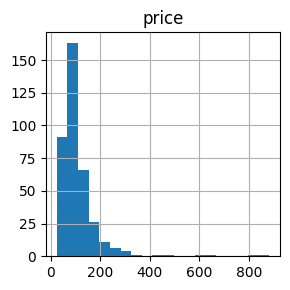

In [12]:
# Ahora vamos a analizar el comportamiento de manera gráfica para lo cual cargamos la librería
import matplotlib.pyplot as plt

# Histogramas de frecuencia
data[variables_continuas].hist('price', figsize=(3, 3), bins=20)
plt.tight_layout()
plt.show()

#Analiza el resultado y explora el código para mejorar el gráfico

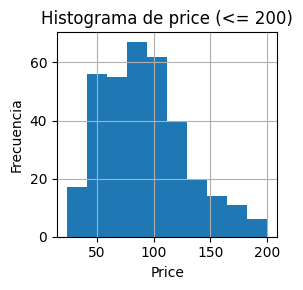

In [13]:
#Ahora probemos otra sintáxis

data[data['price'] <= 200]['price'].hist(figsize=(3, 3), bins=10)

plt.title('Histograma de price (<= 200)')
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

#Analiza el resultado y comparte tus conclusiones.
#Compara las dos sintaxis, que observas?

In [14]:
data_continuas2=data.loc[:, ['price','neighbourhood']]
data_continuas2.head(10)

,price,neighbourhood
0,882.0,FOURTEENTH WARD
1,106.0,THIRTEENTH WARD
2,99.0,SIXTH WARD
3,58.0,NINTH WARD
4,50.0,NINTH WARD
5,93.0,SIXTH WARD
6,156.0,FOURTEENTH WARD
7,142.0,FOURTEENTH WARD
8,96.0,SIXTH WARD
9,88.0,SIXTH WARD


In [15]:
# Calculamos la frecuencia por cada valor que toma la variable
frecuencia_neighbourhood = data_continuas2['neighbourhood'].value_counts()
print(frecuencia_neighbourhood)

neighbourhood
SIXTH WARD         96
SECOND WARD        51
TENTH WARD         44
THIRTEENTH WARD    42
THIRD WARD         39
NINTH WARD         32
FOURTEENTH WARD    24
FIFTEENTH WARD     18
SEVENTH WARD       16
ELEVENTH WARD      15
FOURTH WARD        14
EIGHTH WARD        11
FIRST WARD          9
FIFTH WARD          7
TWELFTH WARD        6
Name: count, dtype: int64


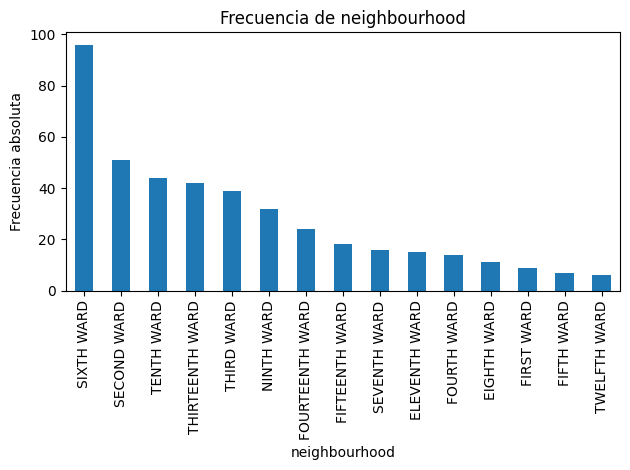

In [16]:
plot_frec_abs = data_continuas2['neighbourhood'].value_counts().plot(kind='bar', title='Frecuencia de neighbourhood')

plt.xlabel('neighbourhood')
plt.ylabel('Frecuencia absoluta')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

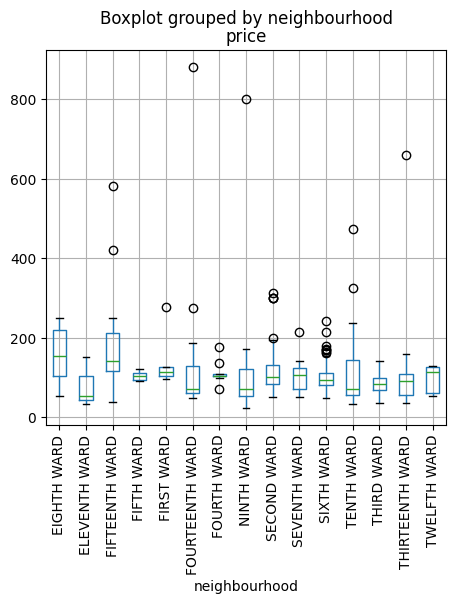

In [17]:
# Ahora vamos a realizar el análisis con los boxplot
data_continuas2.boxplot('price',by="neighbourhood", figsize=(5,5))
plt.xticks(rotation=90)
plt.show()

## Vamos a revisar lo que hemos aprendido hasta acá
#### ¿Qué información nos proporcionan las estadísticas descriptivas?
#### ¿Qué información nos proporcionan los gráficos?
#### Cómo cientifico de datos cuál es tu recomendación del método a utilizar para analizar variables continuas?

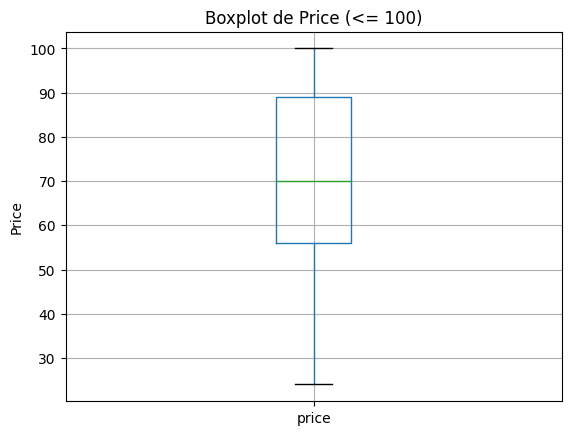

In [18]:
#Ahora vamos a explorar un tipo de gráfico que combina los dos métodos.
data[data['price']<=100].boxplot('price')

plt.title('Boxplot de Price (<= 100)')
plt.ylabel('Price')
plt.show()

### Ahora vamos a analizar las variables categóricas

In [19]:
#Seleccionamos en el dataset las variables categóricas de interés
variables_categoricas = ['neighbourhood','room_type']

# Calculamos la frecuencia por cada valor que toma la variable
frecuencia_neighbourhood = data['room_type'].value_counts()
print(frecuencia_neighbourhood)

room_type
Entire home/apt    308
Private room       116
Name: count, dtype: int64


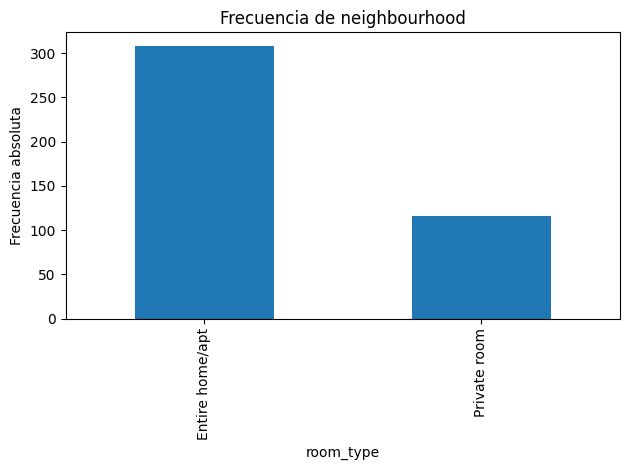

In [20]:
plot_frec_abs = data['room_type'].value_counts().plot(kind='bar', title='Frecuencia de neighbourhood')

plt.xlabel('room_type')
plt.ylabel('Frecuencia absoluta')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Replique el ejercicio para la vaiable room_type

In [21]:
#Esta sintaxis permite generar la tabla de frecuencias para las dos variables a la vez

for col in variables_categoricas:
    print(f"Frecuencia de valores en la variable '{col}':")
    print(data[col].value_counts())
    print("\n" + "-"*40 + "\n")

Frecuencia de valores en la variable 'neighbourhood':
neighbourhood
SIXTH WARD         96
SECOND WARD        51
TENTH WARD         44
THIRTEENTH WARD    42
THIRD WARD         39
NINTH WARD         32
FOURTEENTH WARD    24
FIFTEENTH WARD     18
SEVENTH WARD       16
ELEVENTH WARD      15
FOURTH WARD        14
EIGHTH WARD        11
FIRST WARD          9
FIFTH WARD          7
TWELFTH WARD        6
Name: count, dtype: int64

----------------------------------------

Frecuencia de valores en la variable 'room_type':
room_type
Entire home/apt    308
Private room       116
Name: count, dtype: int64

----------------------------------------



In [22]:
#Ahora descubre que pasa con esta sintaxis
frecuencia_neighbourhood = data[variables_categoricas].value_counts()
print(frecuencia_neighbourhood)

neighbourhood    room_type      
SIXTH WARD       Entire home/apt    83
SECOND WARD      Entire home/apt    45
THIRD WARD       Entire home/apt    33
TENTH WARD       Private room       25
THIRTEENTH WARD  Entire home/apt    23
TENTH WARD       Entire home/apt    19
THIRTEENTH WARD  Private room       19
NINTH WARD       Entire home/apt    17
                 Private room       15
SEVENTH WARD     Entire home/apt    15
FOURTEENTH WARD  Entire home/apt    14
FIFTEENTH WARD   Entire home/apt    14
SIXTH WARD       Private room       13
FOURTH WARD      Entire home/apt    12
FOURTEENTH WARD  Private room       10
ELEVENTH WARD    Private room        9
FIRST WARD       Entire home/apt     9
EIGHTH WARD      Entire home/apt     8
SECOND WARD      Private room        6
THIRD WARD       Private room        6
ELEVENTH WARD    Entire home/apt     6
FIFTH WARD       Entire home/apt     5
TWELFTH WARD     Entire home/apt     5
FIFTEENTH WARD   Private room        4
EIGHTH WARD      Private room  

In [23]:
#Mejoremos la visualización, pero antes filtremos el dataset para simplificar el código

data_categoricas=data.loc[:, ['neighbourhood','room_type']]

Tabla = pd.crosstab(index=data_categoricas.neighbourhood,columns=data_categoricas["room_type"])
Tabla

# Se obtuvo el mismo resultado?

room_type,Entire home/apt,Private room
neighbourhood,,
EIGHTH WARD,8,3
ELEVENTH WARD,6,9
FIFTEENTH WARD,14,4
FIFTH WARD,5,2
FIRST WARD,9,0
FOURTEENTH WARD,14,10
FOURTH WARD,12,2
NINTH WARD,17,15
SECOND WARD,45,6


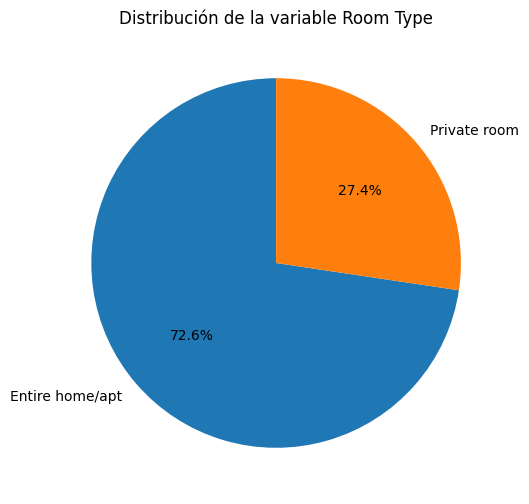

In [24]:

# Agrupamos por la variable 'v' y contamos ocurrencias
conteo = data_categoricas['room_type'].value_counts()

# Creamos el gráfico de torta
conteo.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6, 6))

# Opcional: agregar título
plt.title('Distribución de la variable Room Type')

# Eliminar el eje Y que se añade por defecto
plt.ylabel('')

# Mostrar el gráfico
plt.show()

## Análisis bivariado (Variables continuas vs Variables categóricas)
Ahora vamos a integrar los dos tipos de variables en el análisis

In [25]:
#Exploración de variables continuas y categórica a través de análisi bivariados.
#Vamos a filtras las variables a analizar

data_bivariado=data.loc[:, ['price','minimum_nights', 'availability_365', 'room_type', 'neighbourhood']]
data_bivariado.head()

,price,minimum_nights,availability_365,room_type,neighbourhood
0,882.0,1,330,Entire home/apt,FOURTEENTH WARD
1,106.0,1,86,Entire home/apt,THIRTEENTH WARD
2,99.0,1,341,Entire home/apt,SIXTH WARD
3,58.0,2,248,Entire home/apt,NINTH WARD
4,50.0,2,340,Private room,NINTH WARD


In [26]:
#El siguiente código nos permite responder a la pregunta de ¿Cuál es el precio promedio de alquiler por tipo de habitación?

data_bivariado.pivot_table(values='price',columns='room_type',aggfunc="mean").round(2)

room_type,Entire home/apt,Private room
price,125.02,69.56


In [27]:
#Ahora vamos a ajustar la sintaxis para obtener distintas métricas para la misma variable

data_bivariado.pivot_table(values='price',columns='room_type',aggfunc=["mean", "median", "std"]).round(2)

mean                       median               \
room_type Entire home/apt Private room Entire home/apt Private room   
price              125.02        69.56           101.0         56.0   

                      std               
room_type Entire home/apt Private room  
price               94.17        40.98

In [28]:
# Mejoremos la visualización

tabla=data_bivariado.pivot_table(values='price',columns='room_type',aggfunc=['mean', 'median', 'std']).round(2)
tabla_final = tabla.stack(level=1, future_stack=True).reset_index()
print(tabla_final)

  level_0        room_type    mean  median    std
0   price  Entire home/apt  125.02   101.0  94.17
1   price     Private room   69.56    56.0  40.98


In [29]:
# Ahora vamos a incluir más variables continuas
tabla_multi = data_bivariado.pivot_table(
    values=['price', 'minimum_nights', 'availability_365'],
    index=['room_type', 'neighbourhood'],
    aggfunc=['mean', 'median', 'std']
).round(2)

print(tabla_multi)

                                            mean                         \
                                availability_365 minimum_nights   price   
room_type       neighbourhood                                             
Entire home/apt EIGHTH WARD               226.25           5.25  195.25   
                ELEVENTH WARD             242.33           1.83  114.20   
                FIFTEENTH WARD            317.93           5.64  221.50   
                FIFTH WARD                245.20           2.00  106.00   
                FIRST WARD                173.44           5.78  134.86   
                FOURTEENTH WARD           240.50           3.00  180.07   
                FOURTH WARD               230.83           4.42  118.57   
                NINTH WARD                257.29           7.71  151.80   
                SECOND WARD               214.76           2.42  125.55   
                SEVENTH WARD              213.13           6.07  104.00   
                SIXTH WAR

<Axes: title={'center': 'price'}, xlabel='room_type'>

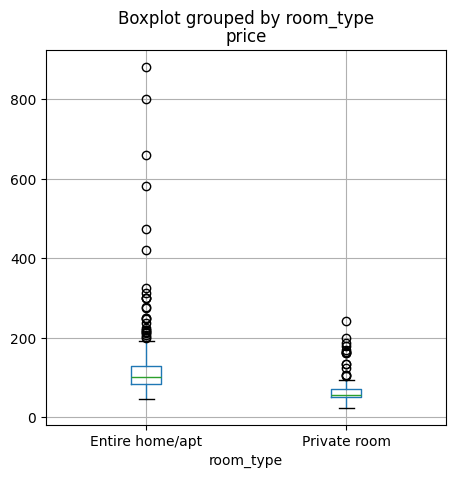

In [30]:
# Ahora vamos a realizar el análisis con los boxplot
data_bivariado.boxplot('price',by="room_type", figsize=(5,5))

In [31]:
df_private_room= data[data['room_type'] == 'Private room']
df_private_room.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
4,24606880,The Western Suite,98744672,Bela,NaN,NINTH WARD,42.65431,-73.78178,Private room,50.0,2,48,2025-02-27,0.62,8,340,9,NaN
11,937927979762952960,Hudson 4 at The Argus Hotel,526358730,Argus,NaN,TENTH WARD,42.66043,-73.77432,Private room,165.0,1,2,2024-10-12,0.33,12,300,2,NaN
12,937837897631191808,Hudson 2 at The Argus Hotel,526358730,Argus,NaN,SIXTH WARD,42.65867,-73.77479,Private room,165.0,1,2,2023-12-31,0.11,12,304,0,NaN
15,938271786418327552,Knickerbocker 3 The Argus Hotel,526358730,Argus,NaN,SIXTH WARD,42.65868,-73.77333,Private room,243.0,1,0,NaT,NaN,12,340,0,NaN
16,937935210290408960,Hudson 5 at The Argus Hotel,526358730,Argus,NaN,SIXTH WARD,42.65847,-73.77272,Private room,161.0,1,5,2024-12-29,0.30,12,336,4,NaN


## Bonus track
#### Métricas disponibles en numpy para variables continuas

### 📊 Estadísticas básicas

| Métrica     | Descripción           | Ejemplo en `aggfunc`    |
|-------------|------------------------|--------------------------|
| `np.mean`   | Media (promedio)       | `aggfunc=np.mean`       |
| `np.sum`    | Suma total             | `aggfunc=np.sum`        |
| `np.min`    | Valor mínimo           | `aggfunc=np.min`        |
| `np.max`    | Valor máximo           | `aggfunc=np.max`        |
| `np.median` | Mediana                | `aggfunc=np.median`     |
| `np.std`    | Desviación estándar    | `aggfunc=np.std`        |
| `np.var`    | Varianza               | `aggfunc=np.var       |
`        |